In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
np.warnings.filterwarnings('ignore')
import datetime
import os


In [3]:
import excursion

import excursion.testcases.oned_fast as scandetails
import excursion.optimize

from excursion.utils import point_entropy, mesh2points, points2mesh, values2mesh



import excursion.plotting.onedim as plots
import excursion.utils as utils

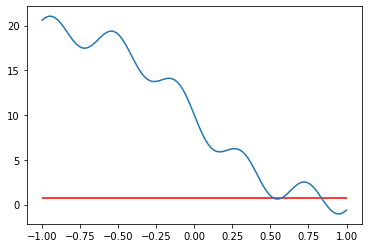

In [4]:

for func in scandetails.truth_functions:
    plt.plot(scandetails.plotX.ravel(),func(scandetails.plotX).ravel())
    
for thr in scandetails.thresholds:
    plt.hlines(thr, np.min(scandetails.plotX),np.max(scandetails.plotX), colors = 'red')


In [5]:
def plot_and_save(workdir, index, *args):
    fig, axarr = plt.subplots(1, 2)
    fig.set_size_inches(9.5, 3.5)
    plots.plot(axarr,gps,X,y_list,scandetails)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

In [6]:
#initialize it...
N_INIT  = 2
N_FUNCS = 1

np.random.seed(1)
X = np.random.uniform(scandetails.plot_rangedef[:,0],scandetails.plot_rangedef[:,1], size = (N_INIT,scandetails.ndims))
y_list = [np.array([scandetails.truth_functions[i](np.asarray([x]))[0] for x in X]) for i in range(N_FUNCS)]

print(X)
print(y_list)

[[-0.16595599]
 [ 0.44064899]]
[array([[14.11284472],
       [ 2.4481451 ]])]


mll -7.408346958878221
10.1**2 * RBF(length_scale=0.411)


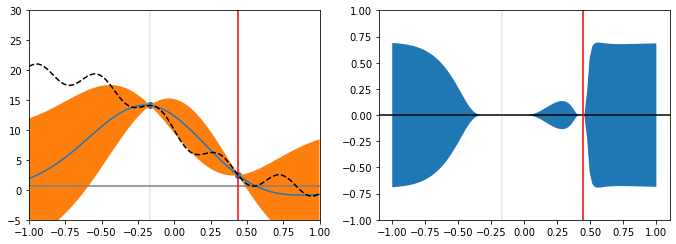

info_gain
[-0.07386376 -0.07757056 -0.08105462 -0.08427267 -0.08718712 -0.08976704
 -0.09198883 -0.09383639 -0.09530102 -0.09638101 -0.09708106 -0.09741158
 -0.09738794 -0.09702973 -0.09635993 -0.09540426 -0.09419043 -0.09274756
 -0.09110561 -0.08929484 -0.08734539 -0.08528688 -0.08314809 -0.08095666
 -0.07873885 -0.07651937 -0.07432118 -0.0721654  -0.07007119 -0.06805568
 -0.06613395 -0.06431901 -0.06262187 -0.06105158 -0.05961538 -0.05831887
 -0.05716616 -0.05616011 -0.05530255 -0.0545944  -0.05403595 -0.05362652
 -0.05336659 -0.05325407 -0.05328795 -0.05346678 -0.0537889  -0.05425246
 -0.05485546 -0.05559567 -0.0564707  -0.05747788 -0.05861431 -0.05987683
 -0.06126197 -0.06276595 -0.06438472 -0.06611388 -0.06794869 -0.06988409
 -0.0719146  -0.07403434 -0.07623694 -0.07851549 -0.08086241 -0.08326942
 -0.08572738 -0.08822619 -0.09075465 -0.09330038 -0.09584967 -0.09838673
 -0.10089753 -0.1033622  -0.10576229 -0.10807792 -0.11028819 -0.11237156
 -0.114306   -0.1160693  -0.11763927 -0.1

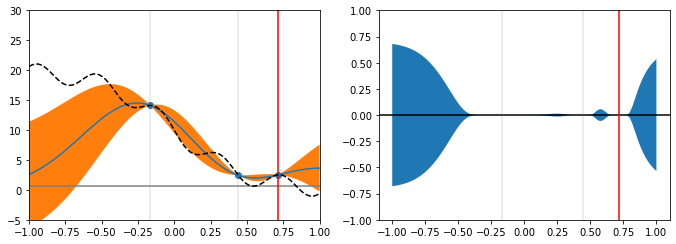

info_gain
[-6.81573948e-02 -7.10336084e-02 -7.36649217e-02 -7.60174170e-02
 -7.80629639e-02 -7.97799673e-02 -8.11537365e-02 -8.21764989e-02
 -8.28471162e-02 -8.31705707e-02 -8.31572963e-02 -8.28224168e-02
 -8.21849466e-02 -8.12669938e-02 -8.00929958e-02 -7.86890072e-02
 -7.70820507e-02 -7.52995387e-02 -7.33687658e-02 -7.13164706e-02
 -6.91684650e-02 -6.69493247e-02 -6.46821375e-02 -6.23883039e-02
 -6.00873862e-02 -5.77970043e-02 -5.55327734e-02 -5.33082844e-02
 -5.11351256e-02 -4.90229433e-02 -4.69795402e-02 -4.50110071e-02
 -4.31218821e-02 -4.13153288e-02 -3.95933233e-02 -3.79568407e-02
 -3.64060314e-02 -3.49403805e-02 -3.35588475e-02 -3.22599843e-02
 -3.10420278e-02 -2.99026190e-02 -2.88407581e-02 -2.78531395e-02
 -2.69376914e-02 -2.60921038e-02 -2.53140170e-02 -2.46010794e-02
 -2.39509642e-02 -2.33613803e-02 -2.28300799e-02 -2.23548634e-02
 -2.19335825e-02 -2.15641421e-02 -2.12445023e-02 -2.09726807e-02
 -2.07467541e-02 -2.05648619e-02 -2.04252089e-02 -2.03260678e-02
 -2.02657808e-0

In [7]:
N_UPDATES = 2

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
for index in range(N_UPDATES):
    gps = [excursion.get_gp(X,y_list[i]) for i in range(N_FUNCS)]
    print(gps[0].kernel_)
    
    plot_and_save(workdir, index, gps,X,y_list,scandetails)    
    
    newx, acqvals = excursion.optimize.gridsearch(gps, X, scandetails)
    np.save('acq_'+str(index)+'.dat',acqvals)

    
    print('Iteration {}. new x: {}'.format(index, newx))
    newys_list = [scandetails.truth_functions[i](np.asarray([newx])) for i in range(N_FUNCS)]
    for i,newys in enumerate(newys_list):
        print('Iteration {}. Evaluted function {} to values: {}'.format(index, i,newys))
        y_list[i] = np.concatenate([y_list[i],newys])
    X = np.concatenate([X,np.array([newx])])

In [8]:
x_candidate = [-0.25]
from excursion.optimize import core
thresholds = [-np.inf] + scandetails.thresholds + [np.inf]
print('thresholds ', thresholds)
acqval = core.info_gain(x_candidate, gps, thresholds, scandetails.meanX) 
print('acqval(x_candidate) ', acqval)

thresholds  [-inf, 0.7, inf]
acqval(x_candidate)  -0.03476311484435528
